#                Credit Card Fraud Detection

## Problem Statement:

We will be analysin the customer data which is european dataset. The dataset has a total of 2,84,807 transactions,in which 492 are fraudulent. 
 
Since Banking fraud poseses high threat to this financial stability for different banks we have to find out the fraudlent data. 

In the banking industry, credit card fraud detection is done using machine learning as it will be proactive and require less manual intervention 

## Objective:

To predict the  fraudulent credit card transactions with the help of different machine learning models.


## Steps

- Library import

- EDA
    - library importing
    - visualizing data
- Finding and mitigating skewness in data
- models on imbalanced dataset and running the cross validation too
    - logistic regression
    - decision tree
    - random forest
    - knn
    - svm
    - xgboost
- Hyperparameter tuning on imbalanced data
    - Random Forest
    - KNN
    - XG Boost
- Class balancing (ADASYN)
    - logistic regression
    - decision tree
    - random forest (best parameters)
    - knn (best parameters)
    - svm
    - xgboost (best parameters)
- Class balancing (SMOTE)
    - logistic regression
    - decision tree
    - random forest (best parameters)
    - knn (best parameters)
    - svm
    - xgboost (best parameters)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN
import warnings
warnings.filterwarnings("ignore")

##  Exploratory data analysis

In [2]:
#importing the data and seeing it
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.shape

(284807, 31)

In [5]:
#observe the different datatype and non null counts present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

we saw that except the class column all the other columns are of the type float

finding the no of unique values in the class columns

In [6]:
df['Class'].nunique()

2

dropping the duplicate rows

In [7]:
##df.drop_duplicates(inplace=True)

In [8]:
##df.shape

there are duplicate rows in the data we are not deleting it as it will reduce already less data

finding the null values in the column

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we will observe the distribution of our classes

#### distribution plotting

In [10]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
non_frauds=classes[0]
frauds=classes[1]
total_transactions=classes[0]+classes[1]
print('There are {} ({:.4f}%) non-fraudulent transactions and {} ({:.4f}%) fraudulent transactions out of total {}  transactions .'.format(non_frauds, normal_share, frauds, fraud_share,total_transactions))

There are 284315 (99.8273%) non-fraudulent transactions and 492 (0.1727%) fraudulent transactions out of total 284807  transactions .


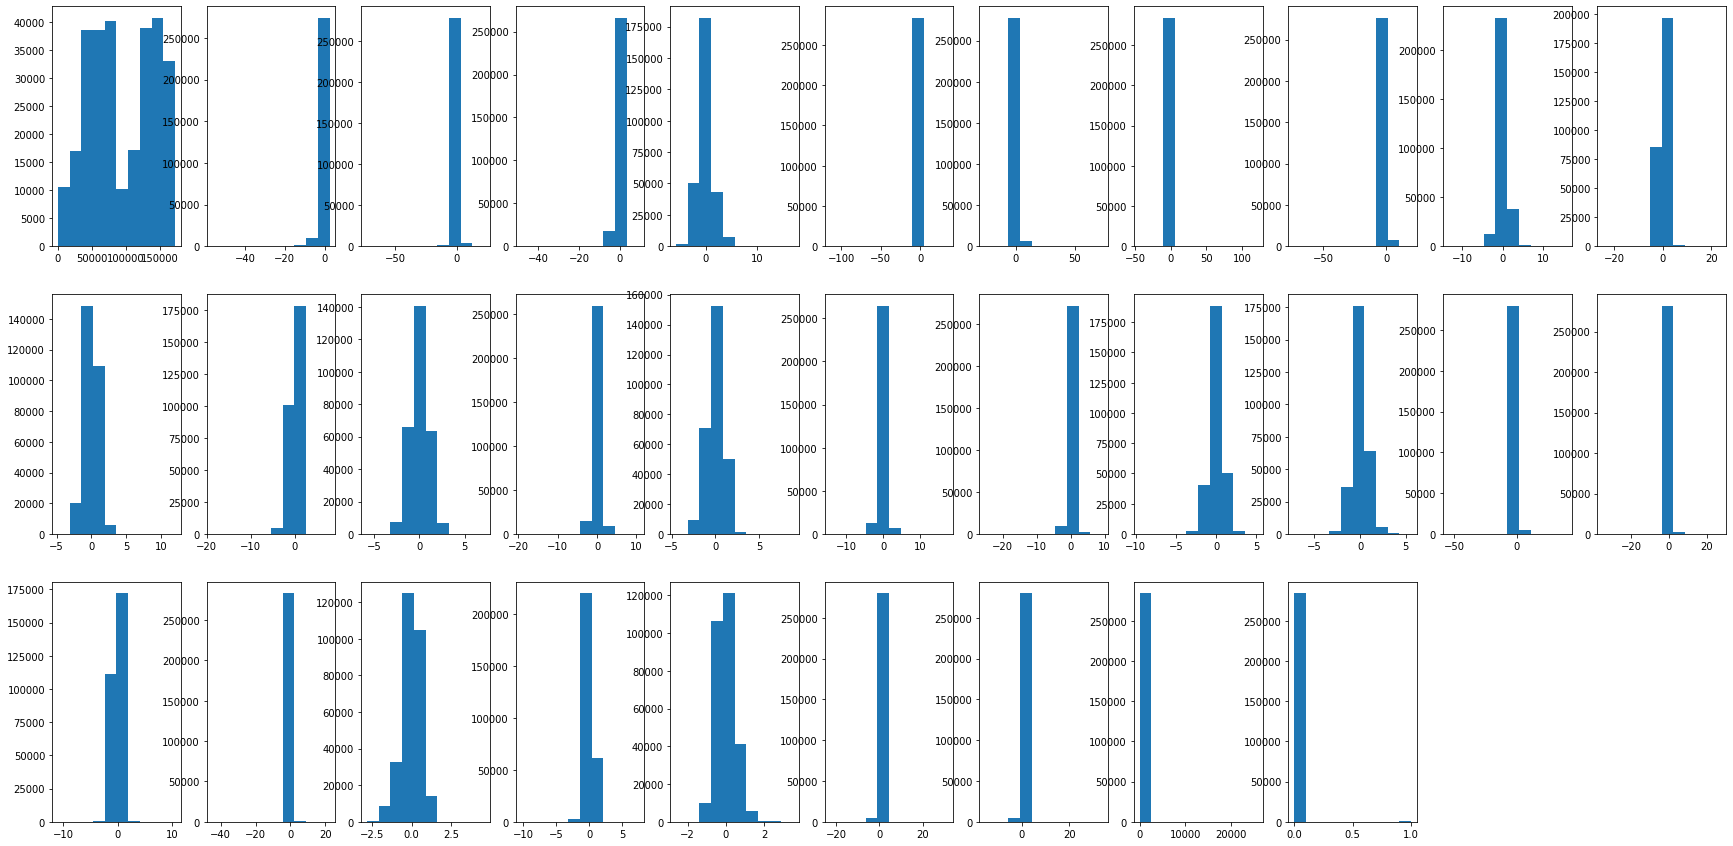

In [11]:
#visualizing the frequency distribution of all the features 
x=df.columns
siz=len(x)
rnd=1
plt.figure(figsize=(30,15))
for i in x:
    if rnd<=siz:
            plt.subplot(3,11,rnd)
            plt.hist(df[i])
            rnd=rnd+1
         

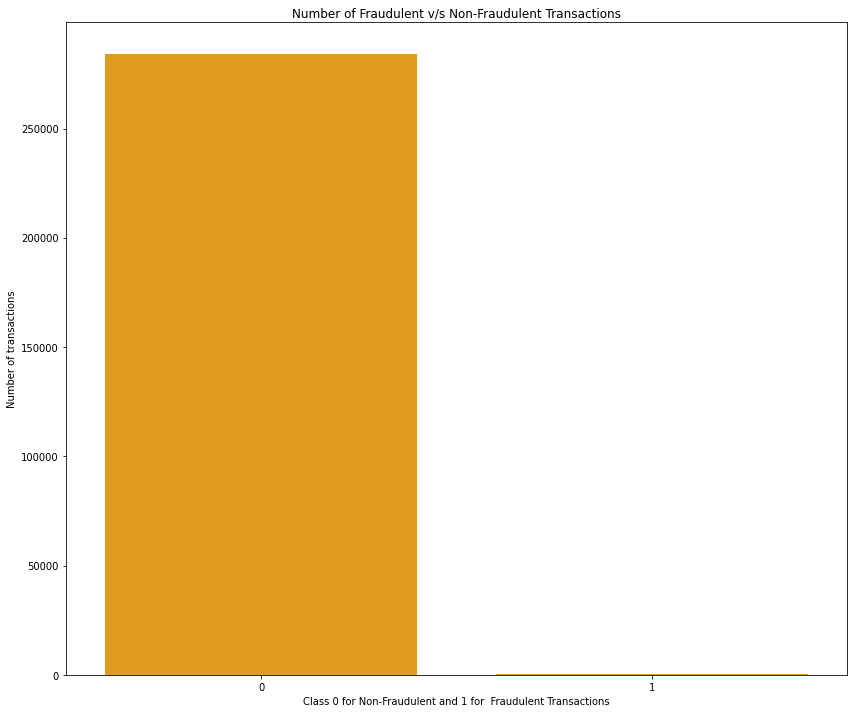

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(14,12))
sns.barplot(x=classes.index, y=classes,color='Orange')
plt.title('Number of Fraudulent v/s Non-Fraudulent Transactions')
plt.ylabel('Number of transactions')
plt.xlabel('Class 0 for Non-Fraudulent and 1 for  Fraudulent Transactions')
plt.show()



the bar plot above shows how high the data imbalance is

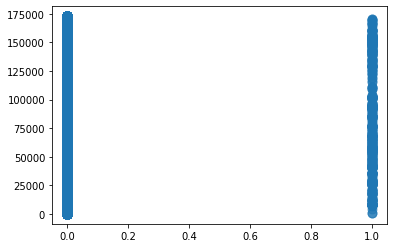

In [13]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Class'],df['Time'],alpha=0.6,s=80)
plt.show()

no clear information is there as both happened over a broad time range

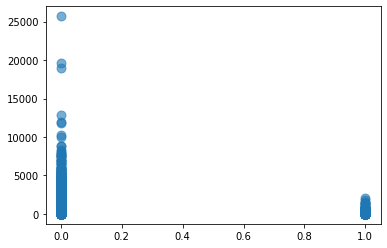

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'],df['Amount'],alpha=0.6,s=80)
plt.show()

we saw that the amount for fraud transactions with the class label 0 is under 3000

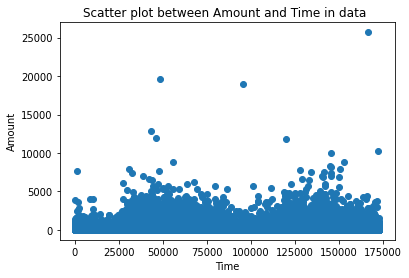

In [15]:
# Create a scatter plot to observe the distribution of Time with Amount
plt.scatter(df['Time'],df['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter plot between Amount and Time in data ')
plt.show()
plt.show()

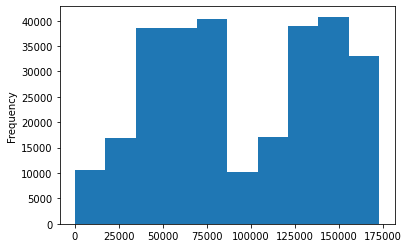

In [16]:
#plotting the Time distribution
df["Time"].plot.hist()
plt.show()

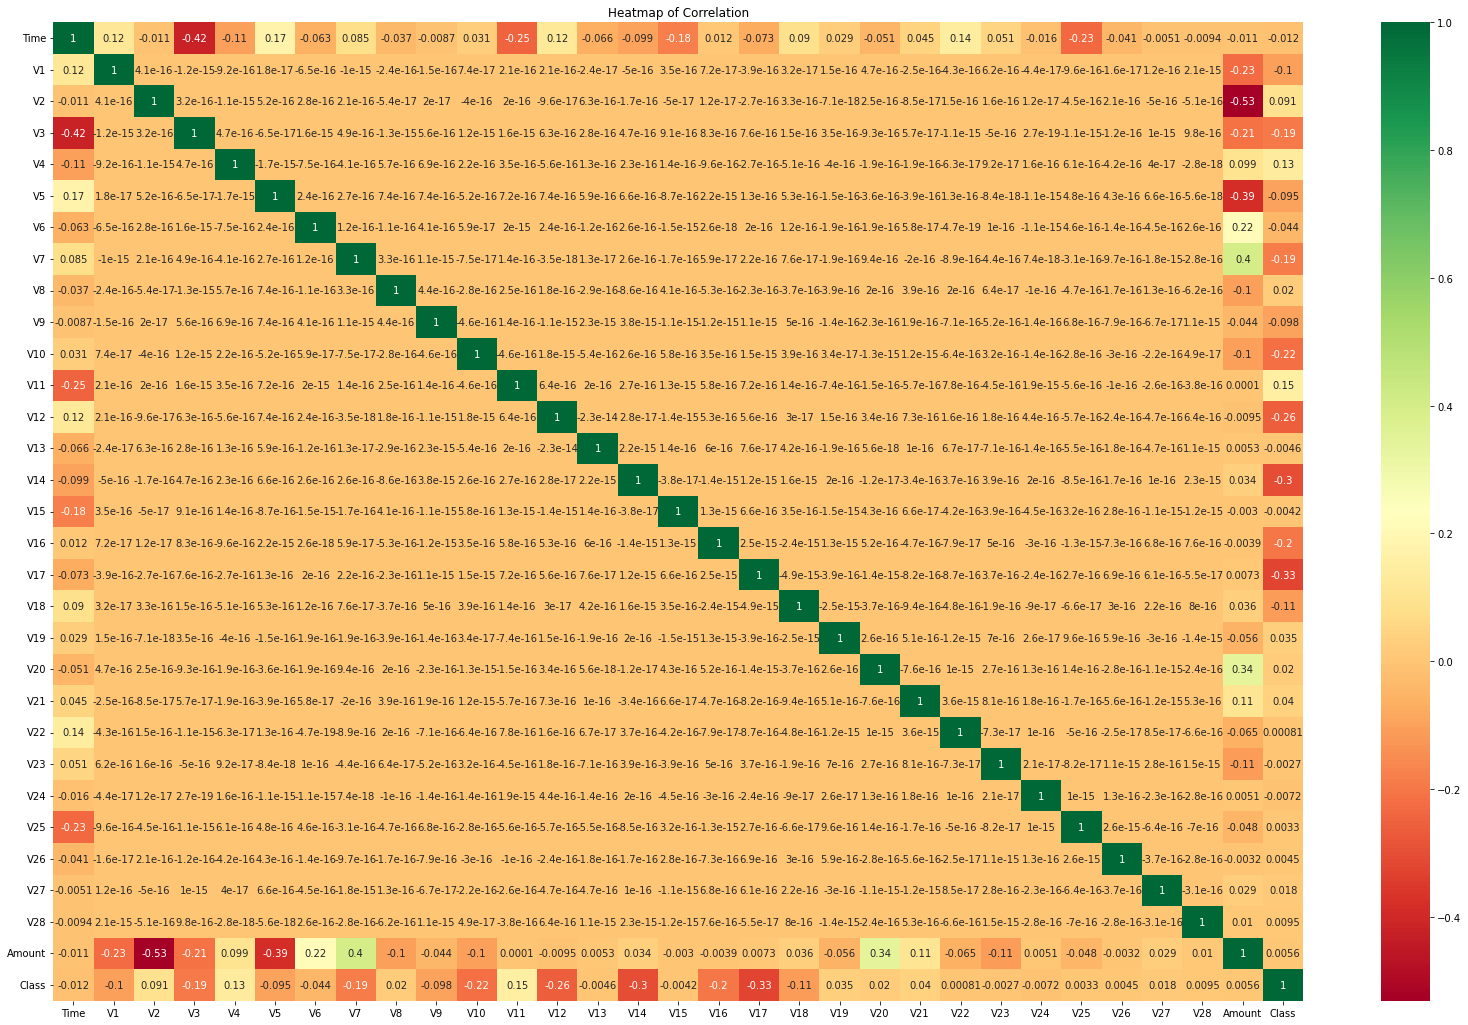

In [17]:
#making an correlation matrix between the features
corr = df.corr()
plt.figure(figsize=(28,18))
sns.heatmap(data=corr,cmap='RdYlGn',annot=True)
plt.title('Heatmap of Correlation')
plt.show()

In [18]:
# Drop unnecessary columns
# we can drop the time column as it doesnot add any new information
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Spliting the data in X and y

In [19]:
y = df.Class
X = df.drop("Class",1)

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Plotting the distribution of a variable

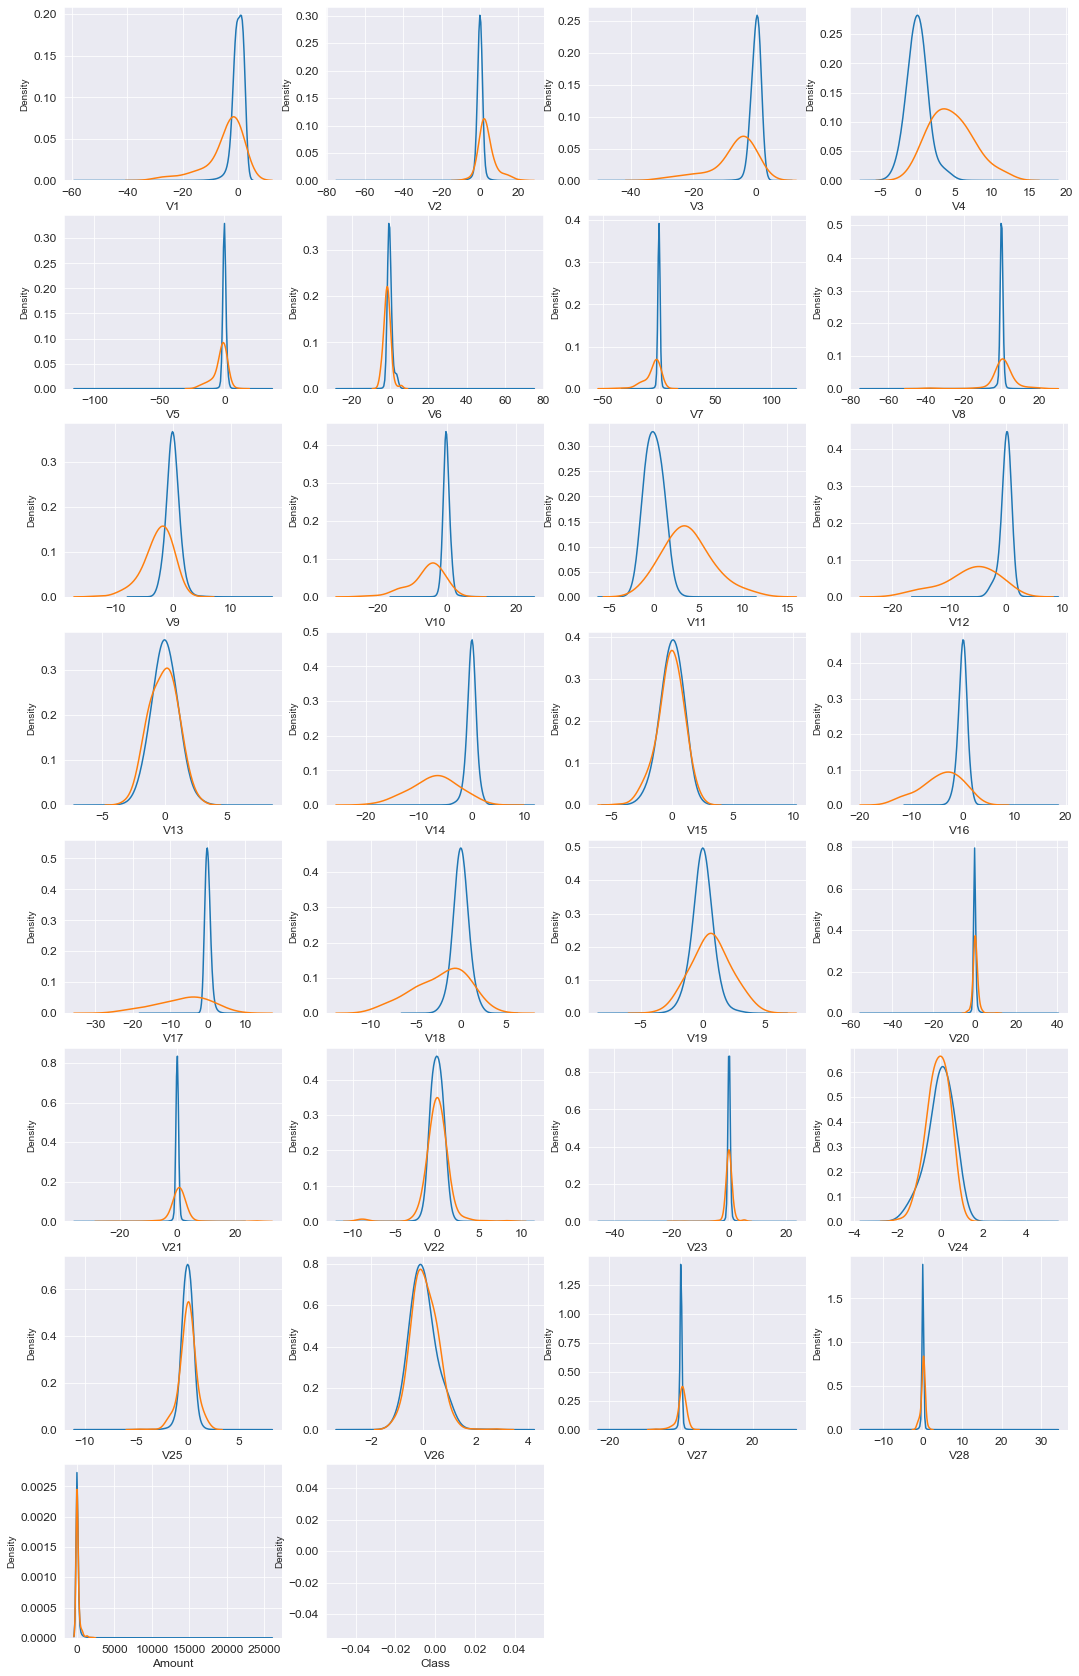

In [22]:
# plot the disribution of a variable from the dataset to see the skewness based on the fradualent and non fraudlent data
sns.set_style('darkgrid')
all_columns = df.columns.values
x = 0
data_0 = df.loc[df['Class'] == 0]
data_1 = df.loc[df['Class'] == 1]
fig, ax = plt.subplots(3,11,figsize=(18,30))
for m in all_columns:
    x += 1
    plt.subplot(8,4,x)
    sns.kdeplot(data_0[m], bw=0.5,label="Class = 0")
    sns.kdeplot(data_1[m], bw=0.5,label="Class = 1")
    plt.xlabel(m, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

here we are plotting the distribution of column data for the fraudlent data
1. we saw that all the features from v1-v29 rep the gaussian features.
2. we saw that few columns rep the clearly seprated distributions between the fraudlent and non fraudlent data 
   (v4,v11) and few columns rep the slightly seprated distributions between the fraudlent and non fraudlent 
   data(v17,v14)and few columns have quite distinct profile between the fraudlent and non fraudlent data  
   (v3,v10) and few columns have similar profile for the both classes (v20,v21) 
3. except the column amount all the transaction with non fraudlant transaction is centred around 0 and has a long   
   extreme values whereas  the fraudlent transaction have skewed distribution

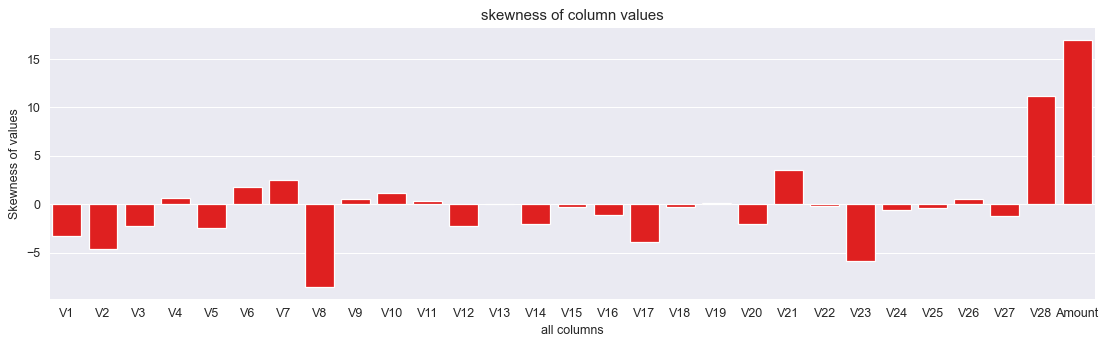

In [23]:
# plot the variables from the dataset to see the skewness in the dataset
sns.set_style('darkgrid')
all_columns=X.columns
plt.figure(figsize=(15,4), dpi=90)
sns.barplot(x=all_columns, y=X[all_columns].skew(), color='red')
plt.xlabel('all columns')
plt.ylabel('Skewness of values')
plt.title('skewness of column values')
plt.show()

we see that the data in the columns are skewed between the values -10 and +15

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data to mitigate the skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False) 
pt.fit_transform(X)

array([[-0.9048152 , -0.13150276,  2.17607386, ...,  0.32302651,
        -0.05333224,  1.11901341],
       [ 0.62638966,  0.09306734, -0.03506242, ..., -0.03579296,
         0.05749143, -1.12846424],
       [-0.90424231, -0.87185802,  1.38129728, ..., -0.15141697,
        -0.17375212,  1.62328625],
       ...,
       [ 1.30917055, -0.27480125, -1.85834088, ..., -0.00218307,
        -0.07043663,  0.67558998],
       [-0.39584388,  0.27752167,  0.39117209, ...,  0.26040007,
         0.33358146, -0.42729815],
       [-0.54534012, -0.20558579,  0.39187039, ..., -0.01937189,
         0.05416788,  1.32320002]])

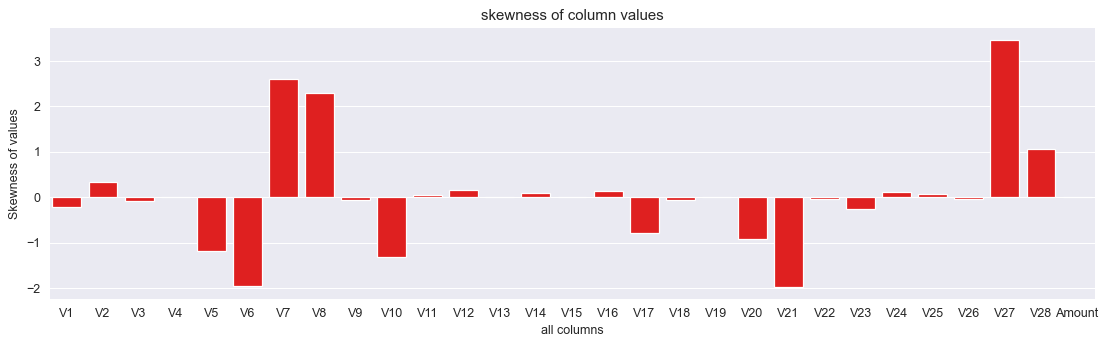

In [25]:
## checking if the skewness is removed
sns.set_style('darkgrid')
all_columns=X.columns
plt.figure(figsize=(15,4), dpi=90)
sns.barplot(x=all_columns, y=X[all_columns].skew(), color='red')
plt.xlabel('all columns')
plt.ylabel('Skewness of values')
plt.title('skewness of column values')
plt.show()

we see that the skewness is reduced in the range of -2 to +3

### Splitting the data into train & test data

In [26]:
# we have to do stratified test train split stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.30,random_state=101)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [27]:
#checking the total no of train and test y parameters
print('y:-',np.sum(y))
print('y_train:-',np.sum(y_train))
print('y_test:-',np.sum(y_test))

y:- 492
y_train:- 344
y_test:- 148


In [28]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
16285,-0.836579,0.720010,1.275106,0.283520,-0.151733,0.027140,0.028842,0.687962,-0.970178,-0.031892,...,-0.123832,0.316240,0.520460,-0.319393,-0.081115,-0.123312,1.634301,0.266928,0.23386,-0.190749
60600,-0.579538,0.549118,0.519292,0.286099,0.547374,-0.415110,0.366699,-0.180012,-0.326287,-0.117774,...,0.248112,-0.335465,-0.807600,-0.153176,-0.822875,-1.127518,0.380473,0.756834,0.66870,-0.427868
31619,-1.011008,0.224960,1.106389,0.057561,0.516516,-1.041163,1.025478,-0.582089,0.205641,0.699507,...,0.183230,-0.482926,-0.101500,0.327891,0.589501,1.444829,0.893620,0.731203,-0.97433,-0.122240
36539,0.139678,-0.333494,0.198682,1.506563,0.312970,1.579760,-0.245306,0.626865,-0.739802,0.558954,...,0.183999,0.588436,1.226730,-0.307525,-1.930547,0.229659,0.571538,0.077554,0.11137,1.276213
235898,-0.315086,0.046263,-0.116786,-0.052494,0.985787,0.393047,0.685350,-0.207229,0.210299,-0.142296,...,0.189425,0.315464,1.313838,-0.705305,-2.023548,-0.045113,0.270537,0.018764,-0.17311,0.322117


In [29]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
278726,-1.191018,1.025217,-0.678834,-1.103018,1.136900,-0.382135,1.144912,-0.101559,-0.558060,-0.181843,...,-0.419892,0.147523,0.812271,-0.776331,0.163784,3.299732,-0.615208,-2.200501,-1.680634,-0.262643
150912,-0.510332,0.975271,-0.936796,-0.808300,0.984603,-0.489587,0.857515,0.040672,0.583135,-0.733233,...,-0.296842,0.254771,0.956947,-0.340136,0.252596,-0.602440,0.136491,0.232049,0.591101,-1.619788
64291,0.576908,0.061571,0.017442,0.816979,-0.271301,-0.322572,-0.115671,-0.062833,0.542222,-0.761491,...,-0.146853,-0.164505,-0.153236,-0.053458,0.540507,0.830105,0.908687,0.033757,0.145391,-0.308419
138450,-1.196889,0.868686,1.255866,0.222399,-1.202909,0.762949,-1.904095,-2.542458,-0.736543,0.746363,...,-1.676999,4.841157,-0.753804,0.650420,0.535608,-1.096009,-0.322157,1.770290,0.322472,0.101182
62003,-1.225767,1.781151,0.096982,1.896807,-0.796162,0.551282,-1.047994,-0.309043,-0.614896,1.273824,...,-0.345489,2.053053,-0.243089,0.575091,0.443953,-0.196387,0.571897,0.046276,-0.534348,-0.941762


In [30]:
y_train.head()

16285     0
60600     0
31619     0
36539     0
235898    0
Name: Class, dtype: int64

In [31]:
y_test.head()

278726    0
150912    0
64291     0
138450    0
62003     0
Name: Class, dtype: int64

## Model Building
- Build different models on the imbalanced dataset and see the result

## functions 

### AUC-ROC

In [32]:
# defining the auc roc curve function to make the plots
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.5f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.2, 1.15])
    plt.ylim([-0.1, 1.15])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

## 1.Running different models  on imbalanced data

## 1(a) logistic regression 

In [33]:
#initializing the Logistic Regression model and preidcting the data on the imbalanced  dataset
model_logreg_imbdata= LogisticRegression(random_state = 0)
model_logreg_imbdata.fit(X_train,y_train)
y_pred_logreg_imbdata = model_logreg_imbdata.predict(X_test)

In [34]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_logreg_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999414,0.875000,0.999251,0.937207,0.999199
recall,0.999836,0.662162,0.999251,0.830999,0.999251
f1-score,0.999625,0.753846,0.999251,0.876736,0.999199
support,85295.000000,148.000000,0.999251,85443.000000,85443.000000


In [35]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_logreg_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85281    14]
 [   50    98]]


In [36]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_logreg_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9992509626300574
Sensitivity:- 0.6621621621621622
Specificity:- 0.9998358637669266


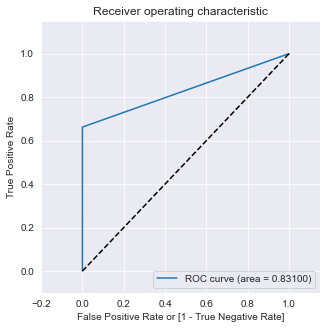

In [37]:
draw_roc(y_test,y_pred_logreg_imbdata)

ROC curve area is 83.1% of logistic regression on imbalanced data

In [38]:
Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_logreg_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)


[0.99907205 0.99919745 0.99907205 0.99937301 0.99922251]


## 1(b) decision tree

In [39]:
#initializing the decision tree model and preidicting the data on the imbalanced  dataset
model_decisiontree_imbdata= DecisionTreeClassifier(random_state = 0)
model_decisiontree_imbdata.fit(X_train,y_train)
y_pred_decisiontree_imbdata = model_decisiontree_imbdata.predict(X_test)

In [40]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_decisiontree_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999683,0.746914,0.999204,0.873298,0.999246
recall,0.999519,0.817568,0.999204,0.908543,0.999204
f1-score,0.999601,0.780645,0.999204,0.890123,0.999222
support,85295.000000,148.000000,0.999204,85443.000000,85443.000000


In [41]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_decisiontree_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85254    41]
 [   27   121]]


In [42]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_decisiontree_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.999204147794436
Sensitivity:- 0.8175675675675675
Specificity:- 0.9995193153174278


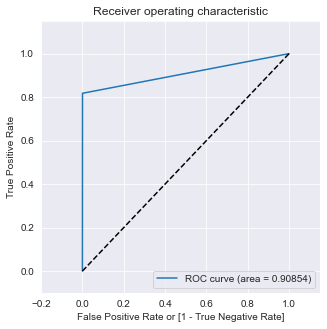

In [43]:
draw_roc(y_test,y_pred_decisiontree_imbdata)

ROC curve area is 90.8% when we use  decisionTree on imbalanced data

In [44]:
Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_decisiontree_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)

[0.99904697 0.99909713 0.99907205 0.99927269 0.99914727]


## 1(c) Random Forest

In [45]:
#initializing the random forest  model and preidicting the data on the imbalanced  dataset
model_randomforest_imbdata= RandomForestClassifier(random_state = 0)
model_randomforest_imbdata.fit(X_train,y_train)
y_pred_randomforest_imbdata = model_randomforest_imbdata.predict(X_test)

In [46]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_randomforest_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999707,0.946154,0.999625,0.972930,0.999614
recall,0.999918,0.831081,0.999625,0.915500,0.999625
f1-score,0.999812,0.884892,0.999625,0.942352,0.999613
support,85295.000000,148.000000,0.999625,85443.000000,85443.000000


In [47]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_randomforest_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85288     7]
 [   25   123]]


In [48]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_randomforest_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9996254813150287
Sensitivity:- 0.831081081081081
Specificity:- 0.9999179318834632


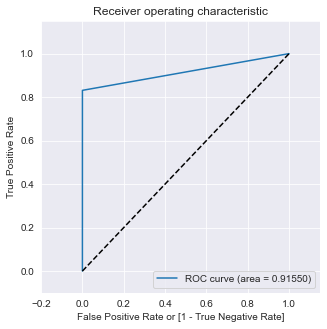

In [49]:
draw_roc(y_test,y_pred_randomforest_imbdata)

ROC curve area is 91.55% when we use  RandomForest on imbalanced data

In [50]:
Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_randomforest_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)

[0.99942317 0.99952349 0.99944825 0.99964889 0.99944823]


## 1(d) KNN

In [51]:
#initializing the random forest  model and preidicting the data on the imbalanced  dataset
model_knn_imbdata= KNeighborsClassifier(n_neighbors=7)
model_knn_imbdata.fit(X_train,y_train)
y_pred_knn_imbdata = model_knn_imbdata.predict(X_test)

In [52]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_knn_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999625,0.920635,0.999508,0.960130,0.999488
recall,0.999883,0.783784,0.999508,0.891833,0.999508
f1-score,0.999754,0.846715,0.999508,0.923235,0.999489
support,85295.000000,148.000000,0.999508,85443.000000,85443.000000


In [153]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_knn_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85285    10]
 [   32   116]]


In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_knn_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9995084442259752
Sensitivity:- 0.7837837837837838
Specificity:- 0.9998827598335189


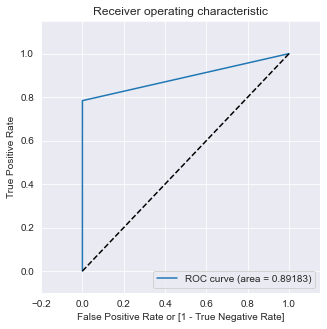

In [54]:
draw_roc(y_test,y_pred_knn_imbdata)

ROC curve area is 89.18% when we use  knn on imbalanced data

In [55]:
Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_knn_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)

[0.99937301 0.99947333 0.99929777 0.99947333 0.99932283]


## 1(e) SVM

In [56]:
#initializing the svm  model and preidicting the data on the imbalanced  dataset
model_svm_imbdata= SVC(kernel = 'linear', random_state = 0)
model_svm_imbdata.fit(X_train,y_train)
y_pred_svm_imbdata = model_svm_imbdata.predict(X_test)

In [57]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_svm_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999660,0.832168,0.99938,0.915914,0.999370
recall,0.999719,0.804054,0.99938,0.901886,0.999380
f1-score,0.999689,0.817869,0.99938,0.908779,0.999374
support,85295.000000,148.000000,0.99938,85443.000000,85443.000000


In [155]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_svm_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85271    24]
 [   29   119]]


In [156]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_svm_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9993797034280163
Sensitivity:- 0.8040540540540541
Specificity:- 0.9997186236004455


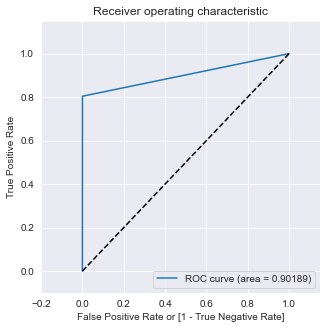

In [59]:
draw_roc(y_test,y_pred_svm_imbdata)

ROC curve area is 90.18% when we use  svm on imbalanced data

Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_svm_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)

## 1(f) XGBoost

In [60]:
#initializing the xgboost  model and preidicting the data on the imbalanced  dataset
model_xgboost_imbdata= XGBClassifier(random_state = 0)
model_xgboost_imbdata.fit(X_train,y_train)
y_pred_xgboost_imbdata = model_xgboost_imbdata.predict(X_test)

In [61]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999695,0.945736,0.999614,0.972716,0.999602
recall,0.999918,0.824324,0.999614,0.912121,0.999614
f1-score,0.999807,0.880866,0.999614,0.940337,0.999601
support,85295.000000,148.000000,0.999614,85443.000000,85443.000000


In [157]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgboost_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85288     7]
 [   26   122]]


In [158]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_xgboost_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9996137776061234
Sensitivity:- 0.8243243243243243
Specificity:- 0.9999179318834632


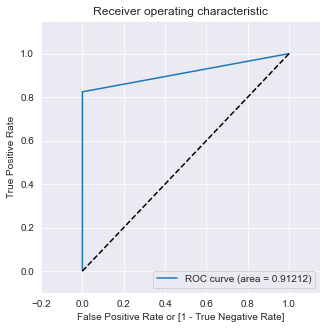

In [63]:
draw_roc(y_test,y_pred_xgboost_imbdata)

ROC curve area is 91.21% when we use  xgbboost on imbalanced data

In [64]:
Stratified_K_Fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model_xgboost_imbdata, X_train, y_train, cv=Stratified_K_Fold, n_jobs=-1)
print(scores)

[0.99949841 0.99954857 0.99947333 0.99967396 0.99949839]


The best AUC-ROC area,sensitivity is under the XGBoost with area as 91.22 and sensitivity of 82.43 . the accuracy and specificity is same as 99.9 in all the models . the 

## 2 HyperParameter Tuning  on imbalanced data

### 2(a) Random Forest 

In [65]:
#old parameters
print(model_randomforest_imbdata.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [66]:
#Create random parameters
no_of_iter = 5
param_combn = {  'n_estimators': [50,100, 200, 300],
    'max_depth': [5,10,30,50],
    'min_samples_leaf': range(1, 2, 4),
    'min_samples_split': range(2, 4, 8),
    'max_features': ['auto', 'sqrt'],
    'bootstrap' : [True, False]
}
model_randomforest_imbdata_hyperparametertuned = RandomizedSearchCV(estimator = model_randomforest_imbdata, param_distributions = param_combn, n_iter =no_of_iter, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [67]:
model_randomforest_imbdata_hyperparametertuned.fit(X_train, y_train)
print('best_parameters')
print(model_randomforest_imbdata_hyperparametertuned.best_params_)
model_randomforest_imbdata_hyperparametertuned_df_cv_results=pd.DataFrame(model_randomforest_imbdata_hyperparametertuned.cv_results_)
model_randomforest_imbdata_hyperparametertuned_df_cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_parameters
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,169.848743,0.956368,0.349187,0.037753,100,2,1,sqrt,10,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999348,0.999599,0.999498,0.999574,0.999473,0.999498,0.000088,4
1,194.075488,14.400933,0.450030,0.024074,100,2,1,sqrt,50,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999273,0.999674,0.999448,0.999599,0.999523,0.999503,0.000138,2
2,536.966464,2.237411,0.970569,0.044192,300,2,1,auto,10,False,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.999323,0.999574,0.999523,0.999574,0.999498,0.999498,0.000092,3
3,295.271380,29.314410,0.464607,0.103003,100,2,1,sqrt,50,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999323,0.999599,0.999498,0.999599,0.999523,0.999508,0.000101,1
4,155.608212,1.933126,0.328298,0.035588,200,2,1,auto,5,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.999248,0.999473,0.999373,0.999448,0.999398,0.999388,0.000079,5


In [68]:
y_pred_randomforest_hyperparameter_imbdata = model_randomforest_imbdata_hyperparametertuned.predict(X_test)

In [69]:
# Predict result on test data
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_randomforest_hyperparameter_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999695,0.953125,0.999625,0.976410,0.999615
recall,0.999930,0.824324,0.999625,0.912127,0.999625
f1-score,0.999812,0.884058,0.999625,0.941935,0.999612
support,85295.000000,148.000000,0.999625,85443.000000,85443.000000


In [70]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_randomforest_hyperparameter_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85289     6]
 [   26   122]]


In [71]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_randomforest_hyperparameter_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9996254813150287
Sensitivity:- 0.8243243243243243
Specificity:- 0.9999296559001114


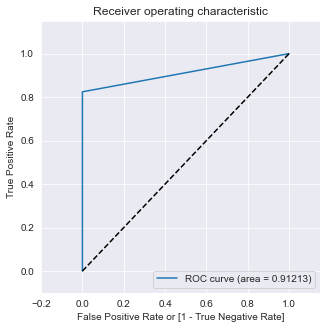

In [72]:
draw_roc(y_test,y_pred_randomforest_hyperparameter_imbdata)

ROC curve area is 91.21% when we use  random forest with hyperparameter tuning  on imbalanced data

### 2(b) KNN

In [73]:
#old parameters
print(model_knn_imbdata.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [74]:
no_of_iter = 5
knn_param_combn = {
    'n_neighbors': [3,5,7,9,11],
    'weights' : ['distance','uniform' ],
    'leaf_size'  : [5,10,20,30],
    'p': [1,2],
    'algorithm'  : ["ball_tree","auto","kd_tree","brute"]
}

model_knn_imbdata_hyperparametertuned = RandomizedSearchCV(estimator = model_knn_imbdata, param_distributions = knn_param_combn, n_iter = no_of_iter, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [75]:
model_knn_imbdata_hyperparametertuned.fit(X_train, y_train)
print('best_parameters')
print(model_knn_imbdata_hyperparametertuned.best_params_)
model_knn_hyperparametertuned_df_cv_results=pd.DataFrame(model_knn_imbdata_hyperparametertuned.cv_results_)
model_knn_hyperparametertuned_df_cv_results

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best_parameters
{'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'kd_tree'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.960669,0.013468,1080.040691,30.187429,uniform,1,3,10,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.999353,0.999518,0.999518,0.999463,0.000078,1
1,0.109675,0.002782,66.363054,0.170169,distance,2,11,5,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.999383,0.999549,0.999428,0.999453,0.000070,2
2,1.169756,0.041737,1239.219462,22.282603,uniform,2,9,5,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.999293,0.999488,0.999368,0.999383,0.000081,5
3,1.277128,0.094557,1418.123179,156.001698,uniform,1,5,30,ball_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.999338,0.999503,0.999443,0.999428,0.000068,4
4,1.378320,0.027114,1035.086638,31.394738,distance,1,11,20,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.999368,0.999518,0.999458,0.999448,0.000062,3


In [76]:
y_pred_knn_hyperparameter_imbdata = model_knn_imbdata_hyperparametertuned.predict(X_test)

In [77]:
#  clsf of train-test data
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_knn_hyperparameter_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999719,0.925373,0.999602,0.962546,0.999590
recall,0.999883,0.837838,0.999602,0.918860,0.999602
f1-score,0.999801,0.879433,0.999602,0.939617,0.999592
support,85295.000000,148.000000,0.999602,85443.000000,85443.000000


In [78]:
#print confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_knn_hyperparameter_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85285    10]
 [   24   124]]


In [79]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_knn_hyperparameter_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.999602073897218
Sensitivity:- 0.8378378378378378
Specificity:- 0.9998827598335189


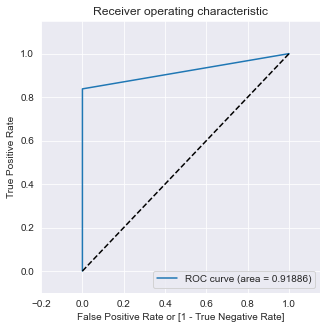

In [80]:
draw_roc(y_test,y_pred_knn_hyperparameter_imbdata)

ROC curve area is 91.88% when we use  knn with hyperparameter tuning  on imbalanced data

## 2(c) XGBoost

In [81]:
#old parameters
print(model_xgboost_imbdata.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [82]:
no_of_iter = 5
xgboost_param_combn = {
        'min_child_weight': [1, 2,5,7],
        'subsample': [0.4,0.6,0.8, 1.0],
        'colsample_bytree': [0.6,0.8, 1.0],
        'learning_rate': [0.3,0.4,0.6],
        'max_depth': [2,4,6,8],
        'n_estimators':[100,150,175,200]
}

model_xgboost_imbdata_hyperparametertuned = RandomizedSearchCV(estimator = model_xgboost_imbdata, param_distributions = xgboost_param_combn, n_iter = no_of_iter, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [83]:
model_xgboost_imbdata_hyperparametertuned.fit(X_train, y_train)
print('best_parameters')
print(model_xgboost_imbdata_hyperparametertuned.best_params_)
model_xgboost_hyperparametertuned_df_cv_results=pd.DataFrame(model_xgboost_imbdata_hyperparametertuned.cv_results_)
model_xgboost_hyperparametertuned_df_cv_results

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best_parameters
{'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.3, 'colsample_bytree': 1.0}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,67.342037,2.650720,0.250788,0.011168,0.6,150,7,4,0.3,1.0,"{'subsample': 0.6, 'n_estimators': 150, 'min_c...",0.999443,0.999564,0.999594,0.999534,0.000065,3
1,64.786214,1.144636,0.234433,0.004686,1.0,100,1,4,0.3,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",0.999503,0.999564,0.999579,0.999549,0.000033,2
2,55.297276,3.142442,0.280271,0.009695,1.0,175,7,8,0.6,0.6,"{'subsample': 1.0, 'n_estimators': 175, 'min_c...",0.999443,0.999549,0.999518,0.999503,0.000044,5
3,77.238414,1.408728,0.192631,0.006362,1.0,100,1,8,0.3,1.0,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",0.999534,0.999579,0.999564,0.999559,0.000019,1
4,49.994055,0.139277,0.184366,0.022162,0.6,175,1,2,0.4,0.8,"{'subsample': 0.6, 'n_estimators': 175, 'min_c...",0.999473,0.999564,0.999488,0.999508,0.000039,4


In [84]:
y_pred_xgboost_hyperparameter_imbdata = model_xgboost_imbdata_hyperparametertuned.predict(X_test)

In [85]:
# Predict result on test data
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_hyperparameter_imbdata, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999707,0.931818,0.999602,0.965763,0.999589
recall,0.999894,0.831081,0.999602,0.915488,0.999602
f1-score,0.999801,0.878571,0.999602,0.939186,0.999591
support,85295.000000,148.000000,0.999602,85443.000000,85443.000000


In [86]:
#print confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgboost_hyperparameter_imbdata)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85286     9]
 [   25   123]]


In [87]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_xgboost_hyperparameter_imbdata))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.999602073897218
Sensitivity:- 0.831081081081081
Specificity:- 0.9998944838501671


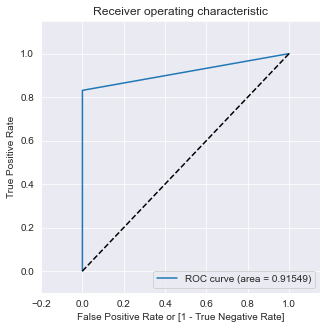

In [88]:
draw_roc(y_test,y_pred_xgboost_hyperparameter_imbdata)

ROC curve area is 91.54% when we use  xgboost with hyperparameter tuning  on imbalanced data

here also the accuracy and specifity of the hypertuned model are 99.9 but the best AUC-ROC is of KNN with area of 91.88

## 3 Class balancing (adasyn)

In [89]:
adasyn_oversampler=ADASYN(random_state=101)
X_train_adasyn, y_train_adasyn = adasyn_oversampler.fit_resample(X_train,y_train)

## 3(a) logistic regression 

In [90]:
#initializing the Logistic Regression model and preidcting the data on the adasyn balanced  dataset
model_logreg_adasyn= LogisticRegression(random_state = 0)
model_logreg_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_logreg_adasyn = model_logreg_adasyn.predict(X_test)

In [91]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_logreg_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999923,0.018633,0.912398,0.509278,0.998223
recall,0.912316,0.959459,0.912398,0.935888,0.912398
f1-score,0.954113,0.036556,0.912398,0.495334,0.952523
support,85295.000000,148.000000,0.912398,85443.000000,85443.000000


In [92]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_logreg_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[77816  7479]
 [    6   142]]


In [93]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_logreg_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))


Accuracy:- 0.9123977388434394
Sensitivity:- 0.9594594594594594
Specificity:- 0.9123160794888329


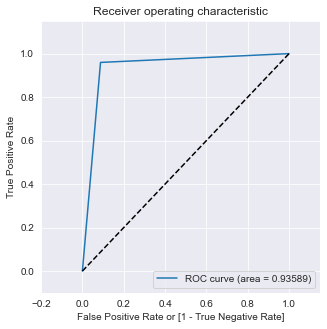

In [94]:
draw_roc(y_test,y_pred_logreg_adasyn)


- with adasyn balanced data the logistic regression gives an roc area of 93.58. it has increased auc-roc from 83.1 . 
- The accuracy is decreased from 99.9 to 91.2 .
- The sensitivity is increased from 66.2 to 95.9
- The spectificity is decreased from 99.9 to 91.2

## 3(b) decision tree

In [95]:
#initializing the Logistic Regression model and preidcting the data on the adasyn balanced  dataset
model_decisiontree_adasyn= DecisionTreeClassifier(random_state = 0)
model_decisiontree_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_decisiontree_adasyn = model_decisiontree_adasyn.predict(X_test)


In [96]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_decisiontree_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999472,0.366548,0.99739,0.683010,0.998375
recall,0.997913,0.695946,0.99739,0.846930,0.997390
f1-score,0.998692,0.480186,0.99739,0.739439,0.997794
support,85295.000000,148.000000,0.99739,85443.000000,85443.000000


In [97]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_decisiontree_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)


confusion_matrix
[[85117   178]
 [   45   103]]


In [98]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_decisiontree_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))



Accuracy:- 0.9973900729141065
Sensitivity:- 0.6959459459459459
Specificity:- 0.9979131250366375


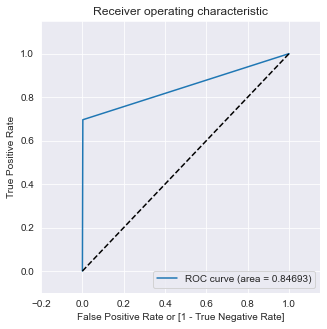

In [99]:
draw_roc(y_test,y_pred_decisiontree_adasyn)


- with adasyn balanced data the decision tree gives an roc area of 84.69 it is decreased from 90.8 to 84.69
- The accuracy is decreased from 99.9 to 99.7 .
- The sensitivity is increased from 81.7 to 69.59
- The spectificity is decreased from 99.9 to 99.79

## 3(c)  Random Forest

In [100]:
# we will initialize the random forest with best hyperparameters we found under the section 2(a)
model_randomforest_adasyn = RandomForestClassifier(random_state = 0, bootstrap= False, max_depth= 50, min_samples_leaf= 1, max_features= 'sqrt', min_samples_split= 2, n_estimators= 100)
model_randomforest_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_randomforest_adasyn = model_randomforest_adasyn.predict(X_test)

In [101]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_randomforest_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999672,0.902256,0.99952,0.950964,0.999503
recall,0.999848,0.810811,0.99952,0.905329,0.999520
f1-score,0.999760,0.854093,0.99952,0.926926,0.999507
support,85295.000000,148.000000,0.99952,85443.000000,85443.000000


In [102]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_randomforest_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85282    13]
 [   28   120]]


In [103]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_randomforest_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9995201479348805
Sensitivity:- 0.8108108108108109
Specificity:- 0.9998475877835746


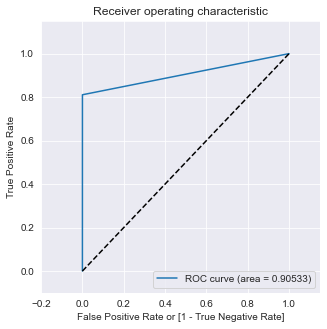

In [104]:
draw_roc(y_test,y_pred_randomforest_adasyn)

- with adasyn balanced data the random forest gives an roc area of 90.53 an decrease from 91.55
- The accuracy  and specificity is same from 99.9 
- The sensitivity is increased from 81.7 to 81.0

## 3(d)  KNN

In [105]:
# we will initialize the knn with best hyperparameters we found under the section 2(b)
model_knn_adasyn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree', weights='uniform', leaf_size=10, p=1)
model_knn_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_knn_adasyn = model_knn_adasyn.predict(X_test)

In [106]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_knn_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999742,0.594340,0.998736,0.797041,0.999040
recall,0.998992,0.851351,0.998736,0.925172,0.998736
f1-score,0.999367,0.700000,0.998736,0.849683,0.998848
support,85295.000000,148.000000,0.998736,85443.000000,85443.000000


In [107]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_knn_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85209    86]
 [   22   126]]


In [108]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_knn_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.998735999438222
Sensitivity:- 0.8513513513513513
Specificity:- 0.9989917345682631


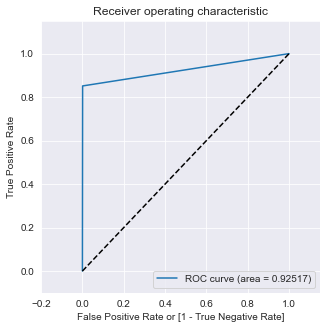

In [109]:
draw_roc(y_test,y_pred_knn_adasyn)


- with adasyn balanced data the knn gives an roc area of 92.51 increased from 91.55 on imbalanced data
- The accuracy is decreased from 99.9 to 99.87 .
- The sensitivity is increased from 78.3 to 85.1
- The spectificity is decreased from 99.9 to 99.89

## 3(e)  SVM

In [110]:
#initializing the svm  model and preidicting the data on the imbalanced  dataset
model_svm_adasyn= SVC(kernel = 'linear', random_state = 0)
model_svm_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_svm_adasyn = model_svm_adasyn.predict(X_test)

In [111]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_svm_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999923,0.018299,0.910771,0.509111,0.998222
recall,0.910686,0.959459,0.910771,0.935073,0.910771
f1-score,0.953221,0.035913,0.910771,0.494567,0.951632
support,85295.000000,148.000000,0.910771,85443.000000,85443.000000


In [112]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_svm_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[77677  7618]
 [    6   142]]


In [113]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_svm_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9107709233055955
Sensitivity:- 0.9594594594594594
Specificity:- 0.9106864411747465


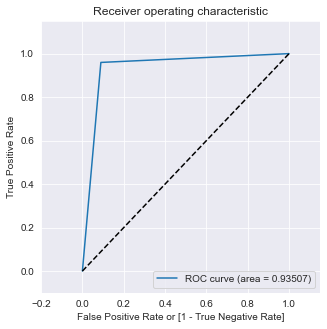

In [114]:
draw_roc(y_test,y_pred_svm_adasyn)

- with adasyn balanced data the svm gives an roc area of 93.5 increased from 90.18 on imbalanced data
- The accuracy is decreased from 99.9 to 99.1 .
- The sensitivity is increased from 80.4 to 95.9
- The spectificity is decreased from 99.9 to 91.06

## 3(f)  XGBoost

In [115]:
# we will initialize the xgb classifier with best hyperparameters we found under the section 2(c)
model_xgboost_adasyn=XGBClassifier(subsample= 1.0, n_estimators= 100, min_child_weight= 1, max_depth= 8, learning_rate= 0.3, colsample_bytree= 1.0,random_state = 0) 
model_xgboost_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred_xgboost_adasyn = model_xgboost_adasyn.predict(X_test)

In [116]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_adasyn, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999730,0.762195,0.999274,0.880963,0.999319
recall,0.999543,0.844595,0.999274,0.922069,0.999274
f1-score,0.999637,0.801282,0.999274,0.900459,0.999293
support,85295.000000,148.000000,0.999274,85443.000000,85443.000000


In [117]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgboost_adasyn)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85256    39]
 [   23   125]]


In [118]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_xgboost_adasyn))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9992743700478681
Sensitivity:- 0.8445945945945946
Specificity:- 0.999542763350724


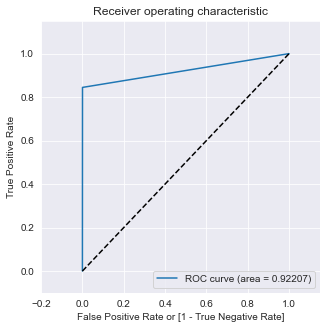

In [119]:
draw_roc(y_test,y_pred_xgboost_adasyn)

- with adasyn balanced data the xgboost gives an roc area of 92.20 increased from 91.22 on imbalanced data
- The accuracy is same as  99.9 
- The sensitivity is increased from 82.4 to 84.4
- The spectificity is decreased from 99.9 to 99.95

## 4 Class balancing (smote)

In [121]:
smote_oversampler=SMOTE(random_state=101)
X_train_smote, y_train_smote = smote_oversampler.fit_resample(X_train,y_train)


## 4(a) logistic regression 

In [122]:
#initializing the Logistic Regression model and preidcting the data on the smote balanced  dataset
model_logreg_smote= LogisticRegression(random_state = 0)
model_logreg_smote.fit(X_train_smote,y_train_smote)
y_pred_logreg_smote = model_logreg_smote.predict(X_test)

In [123]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_logreg_smote, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999843,0.050963,0.970425,0.525403,0.998199
recall,0.970526,0.912162,0.970425,0.941344,0.970425
f1-score,0.984966,0.096532,0.970425,0.540749,0.983427
support,85295.000000,148.000000,0.970425,85443.000000,85443.000000


In [124]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_logreg_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[82781  2514]
 [   13   135]]


In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_logreg_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9704247275961753
Sensitivity:- 0.9121621621621622
Specificity:- 0.9705258221466675


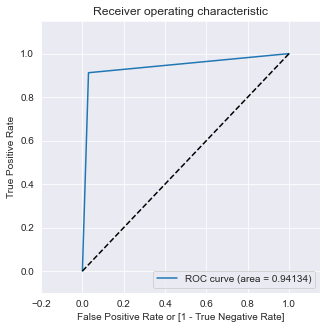

In [126]:
draw_roc(y_test,y_pred_logreg_smote)

- with smote balanced data the logistic regression gives an roc area of 94.134 an good increase from 93.5 of class balancing on adasyn data set
- The accuracy is increased from 91.2 as  97.0 
- The sensitivity is decreased  from 95.9 to 91.2
- The spectificity is decreased from 99.9 to 97

## 4(b) decision tree

In [127]:
#initializing the Logistic Regression model and preidcting the data on the smote balanced  dataset
model_decisiontree_smote= DecisionTreeClassifier(random_state = 0)
model_decisiontree_smote.fit(X_train_smote,y_train_smote)
y_pred_decisiontree_smote = model_decisiontree_smote.predict(X_test)

In [128]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_decisiontree_smote, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999565,0.350158,0.997156,0.674862,0.998440
recall,0.997585,0.750000,0.997156,0.873792,0.997156
f1-score,0.998574,0.477419,0.997156,0.737997,0.997671
support,85295.000000,148.000000,0.997156,85443.000000,85443.000000


In [129]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_decisiontree_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)


confusion_matrix
[[85089   206]
 [   37   111]]


In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_decisiontree_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))


Accuracy:- 0.9971559987359995
Sensitivity:- 0.75
Specificity:- 0.9975848525704907


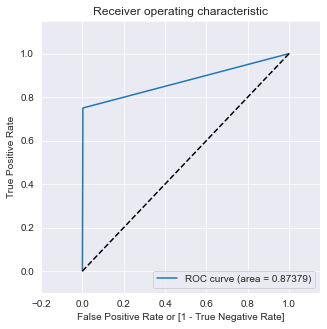

In [131]:
draw_roc(y_test,y_pred_decisiontree_smote)


- with smote balanced data the decision tree gives an roc area of 87.37 an good increase from 84 of class balancing on adasyn data set
- The accuracy is same as 99.7 
- The sensitivity is increased   from 69.59 to 75
- The spectificity is decreased from 99.9 to 99.7

## 4(c)  Random Forest

In [132]:
# we will initialize the random forest with best hyperparameters we found under the section 2(a)
model_randomforest_smote = RandomForestClassifier(random_state = 0, bootstrap= False, max_depth= 50, min_samples_leaf= 1, max_features= 'sqrt', min_samples_split= 2, n_estimators= 100)
model_randomforest_smote.fit(X_train_smote,y_train_smote)
y_pred_randomforest_smote = model_randomforest_smote.predict(X_test)

In [133]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_randomforest_smote, output_dict=True))
clsf_report


,0,1,accuracy,macro avg,weighted avg
precision,0.999672,0.895522,0.999508,0.947597,0.999491
recall,0.999836,0.810811,0.999508,0.905323,0.999508
f1-score,0.999754,0.851064,0.999508,0.925409,0.999496
support,85295.000000,148.000000,0.999508,85443.000000,85443.000000


In [134]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_randomforest_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85281    14]
 [   28   120]]


In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_randomforest_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))


Accuracy:- 0.9995084442259752
Sensitivity:- 0.8108108108108109
Specificity:- 0.9998358637669266


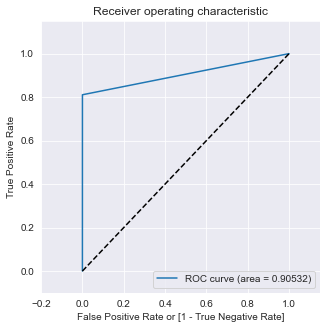

In [136]:
draw_roc(y_test,y_pred_randomforest_smote)


with smote balanced data the random forest gives an roc area of 90.53
all the parameters are same when compared from the adasyn sampled dataset

## 4(d)  KNN

In [137]:
# we will initialize the knn with best hyperparameters we found under the section 2(b)
model_knn_smote = KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree', weights='uniform', leaf_size=10, p=1)
model_knn_smote.fit(X_train_adasyn,y_train_adasyn)
y_pred_knn_smote = model_knn_smote.predict(X_test)

In [138]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_knn_smote, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999742,0.594340,0.998736,0.797041,0.999040
recall,0.998992,0.851351,0.998736,0.925172,0.998736
f1-score,0.999367,0.700000,0.998736,0.849683,0.998848
support,85295.000000,148.000000,0.998736,85443.000000,85443.000000


In [139]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_knn_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85209    86]
 [   22   126]]


In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_knn_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.998735999438222
Sensitivity:- 0.8513513513513513
Specificity:- 0.9989917345682631


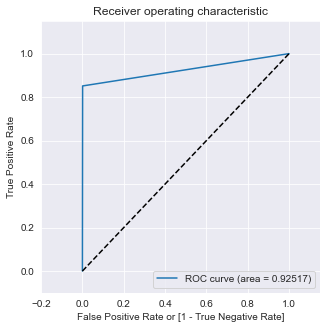

In [141]:
draw_roc(y_test,y_pred_knn_smote)

- with smote balanced data the knn gives an roc area of 92.51. all the parameters are same as the adasyn balanced dataset

## 4(e)  SVM

In [148]:
#initializing the svm  model and preidicting the data on the smote balanced  dataset
model_svm_smote= SVC(kernel = 'linear', random_state = 0)
model_svm_smote.fit(X_train_smote,y_train_smote)
y_pred_svm_smote = model_svm_smote.predict(X_test)


In [149]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_svm_smote, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999843,0.048949,0.969149,0.524396,0.998196
recall,0.969248,0.912162,0.969149,0.940705,0.969149
f1-score,0.984308,0.092911,0.969149,0.538609,0.982764
support,85295.000000,148.000000,0.969149,85443.000000,85443.000000


In [150]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_svm_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[82672  2623]
 [   13   135]]


In [151]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_svm_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))

Accuracy:- 0.9691490233254918
Sensitivity:- 0.9121621621621622
Specificity:- 0.9692479043320241


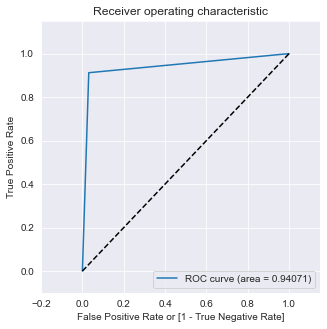

In [152]:
draw_roc(y_test,y_pred_svm_smote)

- with smote balanced data the svm gives an roc area of 94.07 an good increase from 93.5 of class balancing on adasyn data set
- The accuracy is increased from 91.0  to 96.9
- The sensitivity is decreased   from 95.9 to 91.21
- The spectificity is increased  from 91.06 to 96.9

## 4(f)  XGBoost

In [143]:
# we will initialize the xgb classifier with best hyperparameters we found under the section 2(c)
model_xgboost_smote=XGBClassifier(subsample= 1.0, n_estimators= 100, min_child_weight= 1, max_depth= 8, learning_rate= 0.3, colsample_bytree= 1.0,random_state = 0) 
model_xgboost_smote.fit(X_train_smote,y_train_smote)
y_pred_xgboost_smote = model_xgboost_smote.predict(X_test)

In [144]:
#classification report
clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_smote, output_dict=True))
clsf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999719,0.800000,0.999356,0.899859,0.999373
recall,0.999637,0.837838,0.999356,0.918737,0.999356
f1-score,0.999678,0.818482,0.999356,0.909080,0.999364
support,85295.000000,148.000000,0.999356,85443.000000,85443.000000


In [145]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgboost_smote)
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives
print('confusion_matrix')
print(conf_mat)

confusion_matrix
[[85264    31]
 [   24   124]]


In [146]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_xgboost_smote))
# Sensitivity
print("Sensitivity:-",TP / (TP+FN))
# Specificity
print("Specificity:-", TN /(TN+FP))


Accuracy:- 0.9993562960102056
Sensitivity:- 0.8378378378378378
Specificity:- 0.9996365554839088


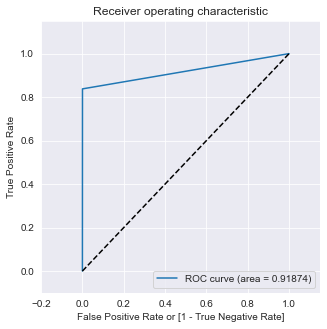

In [147]:
draw_roc(y_test,y_pred_xgboost_smote)


- with smote balanced data the xgboost gives an roc area of 91.87 an decrease from 92.2 of class balancing on adasyn data set
- The accuracy and spectivity is same as 99.9
- The sensitivity is decreased   from 84.4 to 83.7

### the best performing models are

- logistic regression with both smote and adasyn balanced data
- hypertuned SVM with both smote and adasyn balanced data (but it uses high resources)
- hypertuned XG boost with both smote and adasyn balanced data is good but the sensitivity is less 